First 5 Rows:
   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data

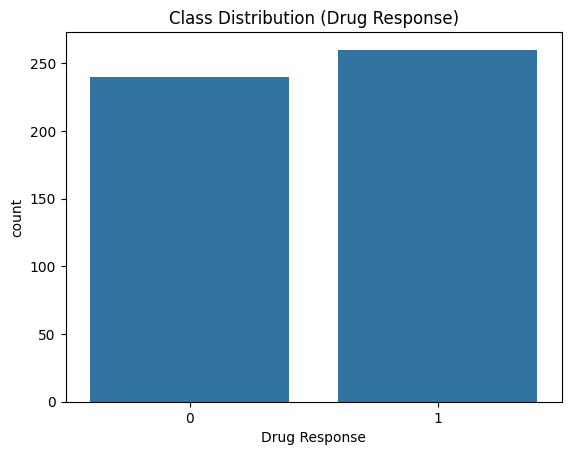

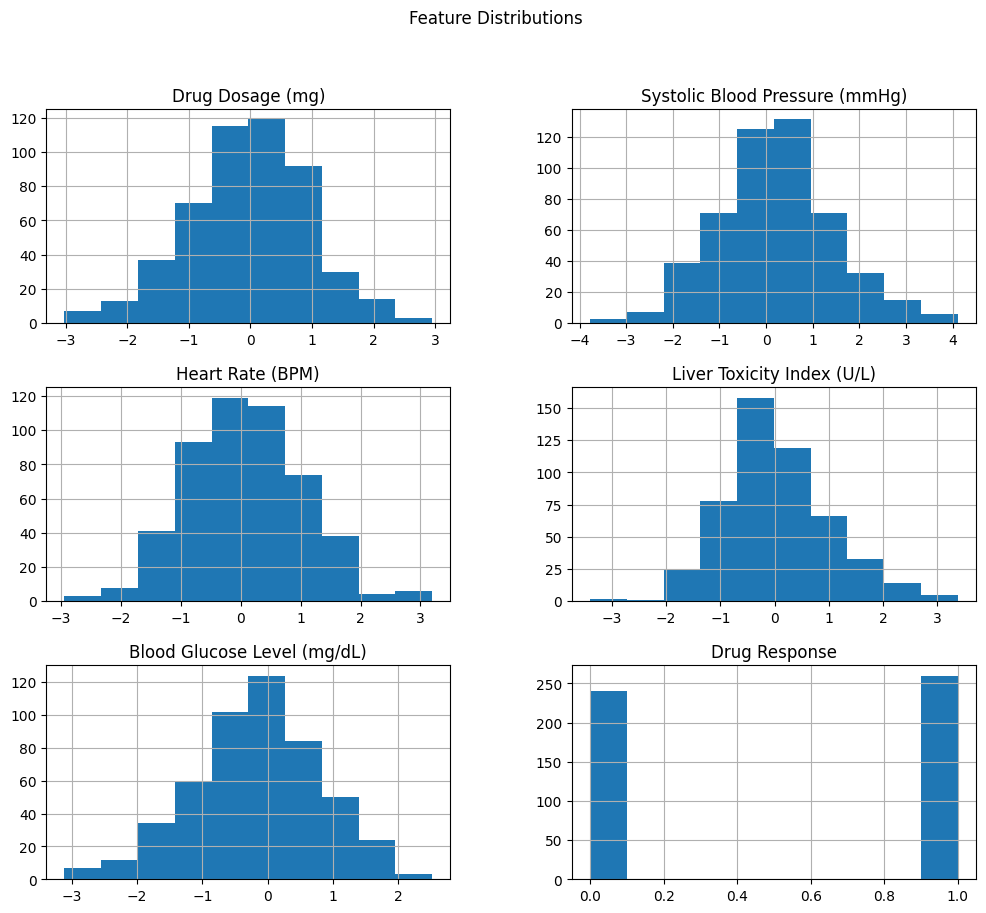

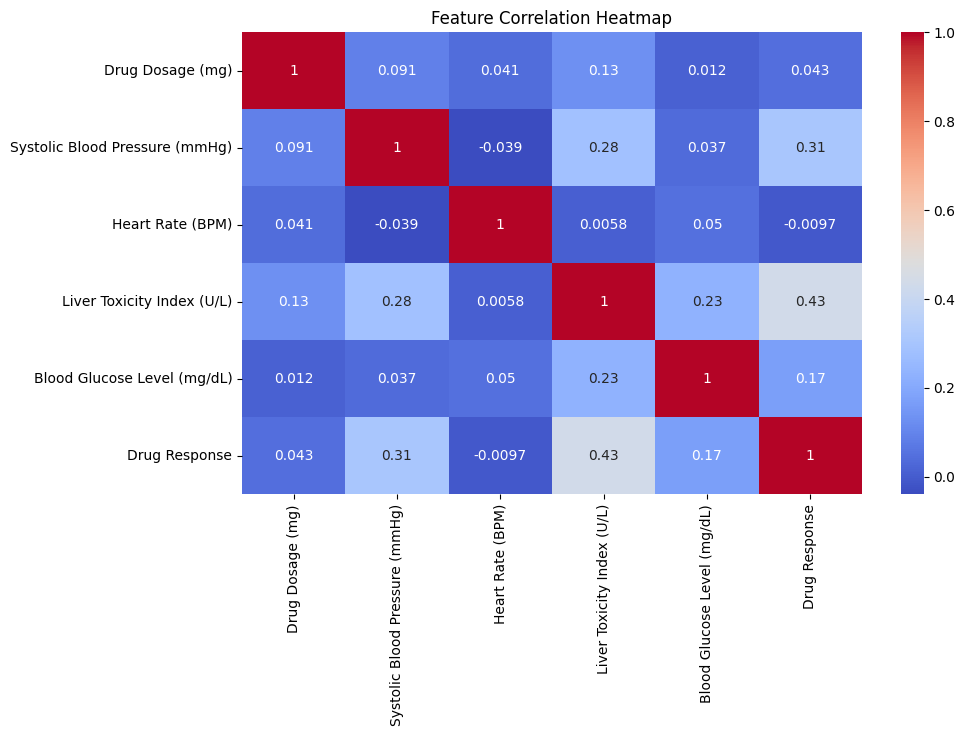


SVM Model Evaluation:
Accuracy: 0.77
Precision: 0.7543859649122807
Recall: 0.8269230769230769
F1 Score: 0.7889908256880734

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



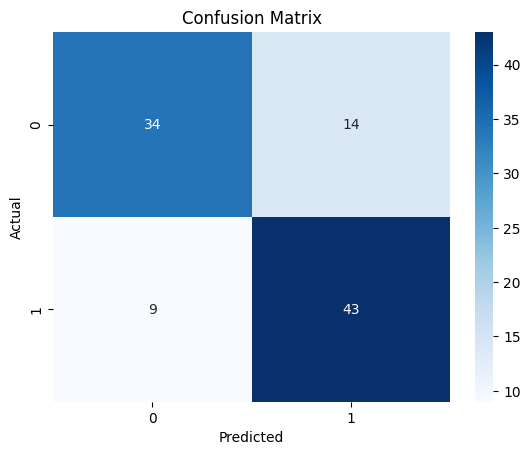


Best Parameters:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Tuned SVM Performance:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        48
           1       0.75      0.79      0.77        52

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100


Kernel Comparison:
linear Kernel Accuracy: 0.7200
rbf Kernel Accuracy: 0.7700
poly Kernel Accuracy: 0.6500

SVM helps classify drug response effectively.
RBF kernel usually performs well with non-linear medical data.
Hyperparameter tuning improves performance.
Useful for personalized medicine and drug efficacy prediction.



In [1]:
# ==============================
# 1. Import Required Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# ==============================
# 2. Load Dataset
# ==============================
df = pd.read_csv("Pharma_Industry.csv")

print("First 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# ==============================
# 3. Exploratory Data Analysis (EDA)
# ==============================

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Target column (change if needed)
target_column = "Drug " \
"Response"

# Class distribution
plt.figure()
sns.countplot(x=df[target_column])
plt.title("Class Distribution (Drug Response)")
plt.show()

# Histograms
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ==============================
# 4. Data Preprocessing
# ==============================

# Encode categorical columns
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================
# 5. SVM Model Implementation
# ==============================

svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==============================
# 6. Hyperparameter Tuning
# ==============================

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="f1")
grid.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid.best_params_)

best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)

print("\nTuned SVM Performance:")
print(classification_report(y_test, y_best_pred))

# ==============================
# 7. Kernel Comparison
# ==============================

kernels = ["linear", "rbf", "poly"]
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[kernel] = accuracy_score(y_test, preds)

print("\nKernel Comparison:")
for k, v in results.items():
    print(f"{k} Kernel Accuracy: {v:.4f}")

# ==============================
# 8. Conclusion
# ==============================
print("""
SVM helps classify drug response effectively.
RBF kernel usually performs well with non-linear medical data.
Hyperparameter tuning improves performance.
Useful for personalized medicine and drug efficacy prediction.
""")
